# Project_1: How debts impact people's lives and their status of loan based on personal parameters.

* Loan_dataset & debt_ impact EDA 

In [2]:
#import all required dependencies for this EDA project:

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading the csv file:
#make changes according to your file path.
loan_df = pd.read_csv(r"C:\Users\karki\Desktop\project\Project_1_group8-1\data\LoanDataset - LoansDatasest.csv")
impact_df = pd.read_csv(r"C:\Users\karki\Desktop\project\Project_1_group8-1\data\debt_impact_data (2).csv")

In [4]:
# checking:
loan_df.head() #notice this is from UK for the pounds

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [8]:
impact_df.head() # this is from US.

,gender,age,profession,occupation,country_of_residence,urban_rural,owns_car,salary,cost_of_living,marital_status,has_kids,num_kids,debt_type,debt_amount,monthly_debt_payment,savings
0,Male,27,Marketing Specialist,Full-Time,United States,Urban,Yes (Loan),42929,Medium,Single,No,0,Student Loan,41999,5946,11612
1,Female,40,Pilot,Full-Time,United States,Rural,Yes (Loan),69733,High,Single,Yes,1,Student Loan,39599,4459,16244
2,Female,40,Writer,Full-Time,United States,Rural,Yes (Owned),116838,High,Single,No,1,Student Loan,38987,4953,10657
3,Female,37,Writer,Full-Time,United States,Rural,No,49245,High,Married,No,0,Student Loan,27108,735,12349
4,Male,23,Musician,Full-Time,United States,Rural,Yes (Loan),45168,Medium,Married,No,0,Student Loan,23551,6588,19260


In [10]:
loan_df.describe() # we can see some columns dtypes need to be changed.

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.142746,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [12]:
loan_df.info #checking 

<bound method DataFrame.info of        customer_id  customer_age customer_income home_ownership  \
0              1.0            22           59000           RENT   
1              2.0            21            9600            OWN   
2              3.0            25            9600       MORTGAGE   
3              4.0            23           65500           RENT   
4              5.0            24           54400           RENT   
...            ...           ...             ...            ...   
32581      32577.0            57           53000       MORTGAGE   
32582      32578.0            54          120000       MORTGAGE   
32583      32579.0            65           76000           RENT   
32584      32580.0            56          150000       MORTGAGE   
32585      32581.0            99           42000           RENT   

       employment_duration      loan_intent loan_grade   loan_amnt  \
0                    123.0         PERSONAL          C  £35,000.00   
1                      

In [14]:
loan_df.dtypes # need to change dtypes later.

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [16]:
#check all the NaN 
loan_df.isna().sum() # need to drop NA later.

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [18]:
# check for duplication:
loan_df.loc[loan_df.duplicated()] # need to get rid of duplicated roles.

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
323,323.0,25,120000,RENT,6.0,MEDICAL,A,"£1,000,000.00",10.74,10,N,2,DEFAULT
325,324.0,23,120000,RENT,7.0,EDUCATION,A,"£25,000.00",9.99,10,NaN,2,NO DEFAULT
14691,14688.0,21,32000,RENT,6.0,PERSONAL,B,"£15,000.00",15.27,1,Y,3,DEFAULT
14692,14689.0,22,38000,RENT,6.0,PERSONAL,A,"£15,000.00",7.88,2,N,3,DEFAULT
30289,30284.0,47,70000,RENT,3.0,HOMEIMPROVEMENT,A,"£6,000.00",8.49,7,N,12,NO DEFAULT
30290,30285.0,44,70000,RENT,15.0,DEBTCONSOLIDATION,A,"£6,000.00",5.79,4,N,16,DEFAULT


In [20]:
loan_df_test = loan_df.copy() #here making a copy of the original df.
loan_df_test = loan_df_test.drop_duplicates() # drop the duplicates on the copied df.

In [22]:
loan_df_test.columns 

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [24]:
#tidy up the loan_df_test and reframe the df only contains the wanted columns:
tidy_loan_df = loan_df_test[['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years']]
tidy_loan_df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10
...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6


In [26]:
# same here make the copy of tidy loan df and drop NA.
test_copy = tidy_loan_df.copy()
test_copy = test_copy.dropna()

In [28]:
test_copy.shape

(28635, 10)

In [30]:
test_copy = test_copy.reset_index(drop=True).copy() #reseting the index to make it more readable.
test_copy

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10
...,...,...,...,...,...,...,...,...,...,...
28630,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7
28631,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4
28632,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5
28633,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6


In [32]:
# convert dtypes:
test_copy['customer_id'] = test_copy['customer_id'].astype(int).astype(str)
test_copy = test_copy.rename(columns={'loan_amnt':'loan_amnt(pounds)'})
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].astype(str)
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.strip()
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.replace('£', '', regex=False)
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.replace(',', '', regex=False)
test_copy['loan_amnt(pounds)'] = pd.to_numeric(test_copy['loan_amnt(pounds)'])
cleaned_loan_df = test_copy

cleaned_loan_df # this is the variable completed cleasing of the loan data, use this variable for all questions below.

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years
0,1,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10
1,2,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1
2,3,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5
3,4,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10
4,5,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10
...,...,...,...,...,...,...,...,...,...,...
28630,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,7
28631,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,4
28632,32579,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000.0,10.99,5
28633,32580,56,150000,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,6


# Analysis part:

Wang Han's part:

* Please complete your analysis below with plotting. Adding more cells if you need:

Ziyue Zhou's part

* Please complete your analysis below with plotting. Adding more cells if you need:

Rivas Karki's part

* Please complete your analysis below with plotting. Adding more cells if you need:

In [36]:
# Testing the part.
cleaned_loan_df.to_csv(r'C:\Users\karki\Desktop\weather.data\Loan1.csv')

In [38]:
#Hypothesis Testing
from scipy.stats import ttest_ind

In [48]:
home_groups = cleaned_loan_df.groupby('home_ownership')['loan_amnt(pounds)'].apply(list)
home_groups.head()
#grouping the loan amount by home ownership.

home_ownership
MORTGAGE    [5500.0, 30000.0, 1750.0, 4575.0, 7800.0, 2000...
OTHER       [4000.0, 7500.0, 6000.0, 2400.0, 3000.0, 8000....
OWN         [1000.0, 2500.0, 1600.0, 4500.0, 1500.0, 1400....
RENT        [35000.0, 35000.0, 35000.0, 35000.0, 35000.0, ...
Name: loan_amnt(pounds), dtype: object

In [62]:
anova_result = st.f_oneway(*home_groups)
anova_result
#testing anova one way.

F_onewayResult(statistic=9.327806605057308, pvalue=3.6846493146851893e-06)

In [78]:
income_threshold = 30000

In [113]:
cleaned_loan_df['customer_income'] = pd.to_numeric(cleaned_loan_df['customer_income'])

In [119]:
group_high_income = cleaned_loan_df[cleaned_loan_df['customer_income'] > income_threshold]['loan_amnt(pounds)']
group_low_income = cleaned_loan_df[cleaned_loan_df['customer_income'] <= income_threshold]['loan_amnt(pounds)']


In [121]:
t_stat, p_value = ttest_ind(group_high_income, group_low_income)
t_stat, p_value

(12.709483703724779, 6.591061543295403e-37)

In [ ]:
# Pie chart for the loan intent.


In [123]:
loan_intent_counts = cleaned_loan_df['loan_intent'].value_counts(normalize=True) * 100

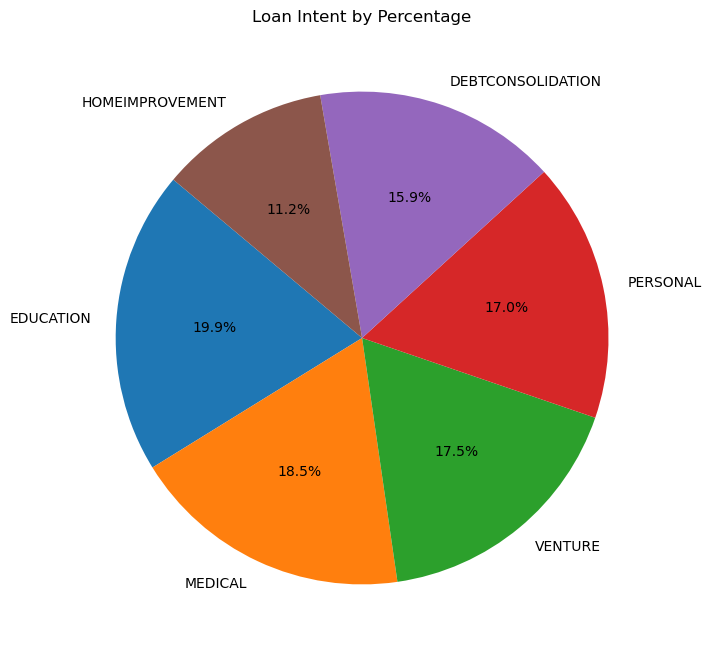

In [125]:
plt.figure(figsize=(8, 8))
plt.pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Intent by Percentage')
plt.show()

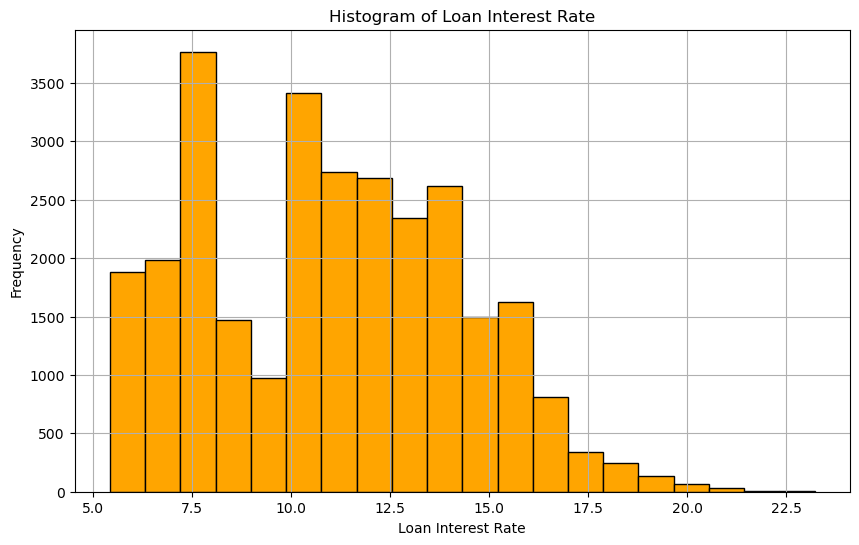

In [137]:
plt.figure(figsize=(10, 6))
plt.hist(cleaned_loan_df['loan_int_rate'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Loan Interest Rate')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [147]:
filtered_loan_data = cleaned_loan_df[cleaned_loan_df['loan_amnt(pounds)'] <= 90000]
filtered_loan_data.head(2)

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years
0,1,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10
1,2,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1


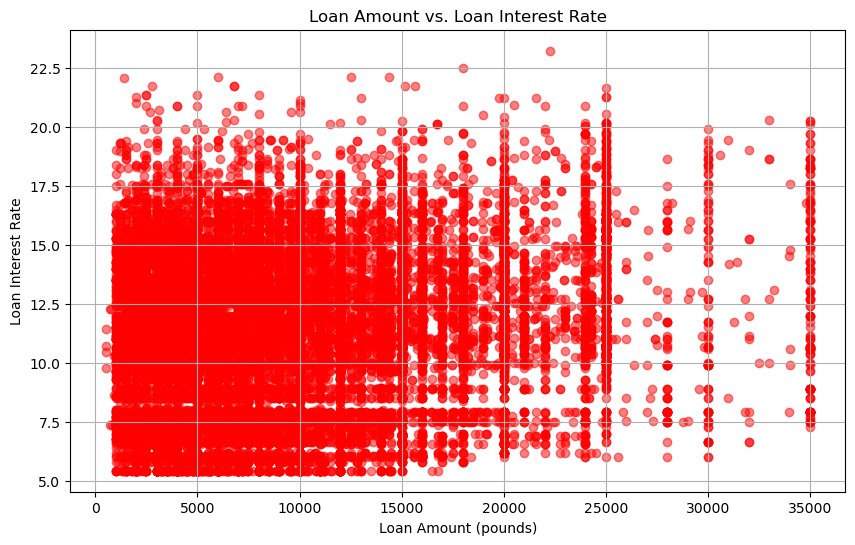

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_loan_data['loan_amnt(pounds)'], filtered_loan_data['loan_int_rate'], alpha=0.5, color='r')
plt.title('Loan Amount vs. Loan Interest Rate')
plt.xlabel('Loan Amount (pounds)')
plt.ylabel('Loan Interest Rate')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

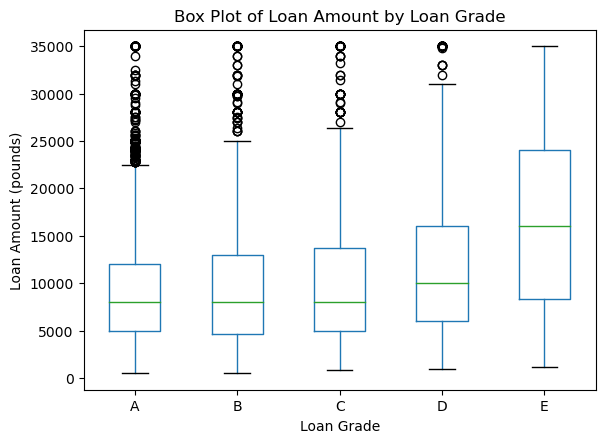

In [161]:
plt.figure(figsize=(10, 6))
filtered_loan_data.boxplot(column='loan_amnt(pounds)', by='loan_grade', grid=False)
plt.title('Box Plot of Loan Amount by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount (pounds)')
plt.suptitle('')
plt.show()

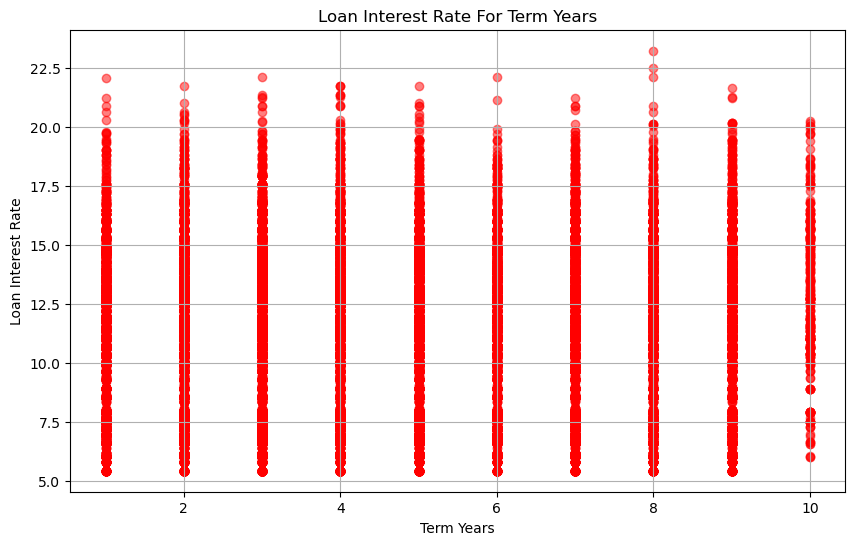

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_loan_data['term_years'], filtered_loan_data['loan_int_rate'], alpha=0.5, color='red')
plt.title('Loan Interest Rate For Term Years')
plt.xlabel('Term Years')
plt.ylabel('Loan Interest Rate')
plt.grid(True)
plt.show()

Jordan Chia's part

* Please complete your analysis below with plotting. Adding more cells if you need: